In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('helium_one.csv')
data = df.to_numpy()
E_exact = -2.903724377034119598311159245194404
E = data[:,0]
E_var = data[:,1]
step = np.linspace(1,len(E),len(E))

warmup = 0.1
E_real = E[int(warmup*len(E)):]

In [2]:
def autocorelation(data,max_lag = 200,allow_neg = False): #Calculates the self correlation and also the correlation lenght
    """
    Compute autocorrelation of a given 1D array.

    Args:
        data (np.ndarray): Input data.
        max_lag (int, optional): Maximum lag to compute autocorrelation. Defaults to 200.
        allow_neg (bool, optional): Whether to allow negative autocorrelation values. Defaults to False.

    Returns:
        tuple: lags, correlation, tc = correlation_time
    """
    if max_lag < 1 or max_lag >= len(data):
        raise ValueError("Max lag must be between 1 and the length of data - 1")

    mc = int(max_lag)#ensure it is an integer
    var = np.var(data,ddof=1)
    center_data = data - np.mean(data)
    lags = np.arange(1, mc+1, 1, dtype=int)
    correlation = np.zeros(mc)
    for j in lags:
        to_av = center_data[:-j]*center_data[j:]
        correlation[j-1] = np.average(to_av)/var
    if not allow_neg:
        correlation[correlation<0] = 0
    tc = 1+2*np.sum(correlation)
    return lags, correlation, tc

In [3]:
lags, corr, tc = autocorelation(E_real,100, False)
print(tc)

14.630242690419164


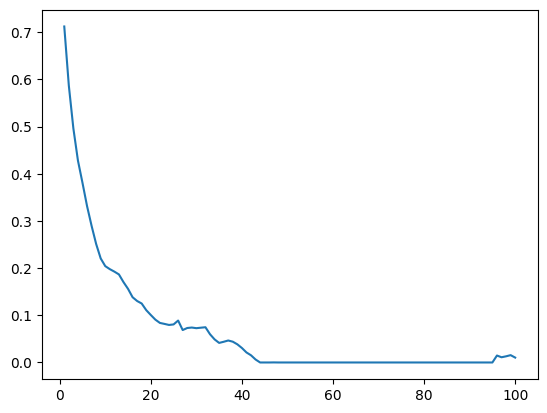

In [4]:
plt.plot(lags,corr)

In [5]:
E_fin = np.mean(E_real)
N_blocks = int(len(E_real/tc))
E_fin_errorbar = np.std(E_real)/np.sqrt(N_blocks)
print('Energy=',E_fin, 'pm', E_fin_errorbar)

Energy= -2.891279514708962 pm 3.0391364301654392e-05


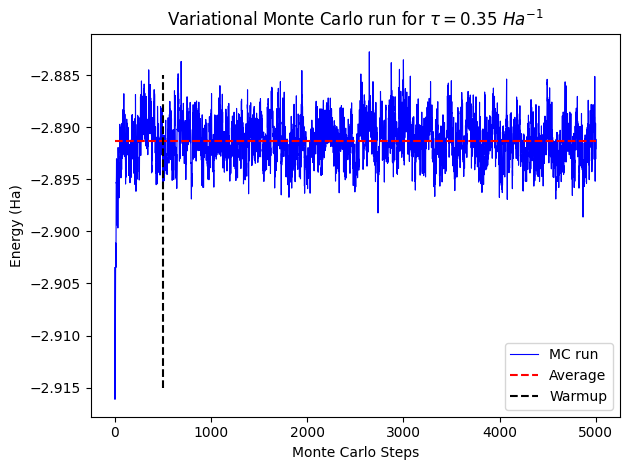

In [6]:
plt.plot(step,E,label='MC run',lw=0.8, c='b')
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Energy (Ha)')
plt.title(r'Variational Monte Carlo run for $\tau = 0.35\ Ha^{-1}$')
plt.plot([0,5000],[-2.891279514708962, -2.891279514708962], label = 'Average',c='r',linestyle = '--')
plt.plot([500, 500],[-2.915,-2.885], label = 'Warmup',c='k', linestyle = '--')
plt.legend()
# Adjust tick label font sizes
plt.tight_layout()

# Show the plot
plt.show()

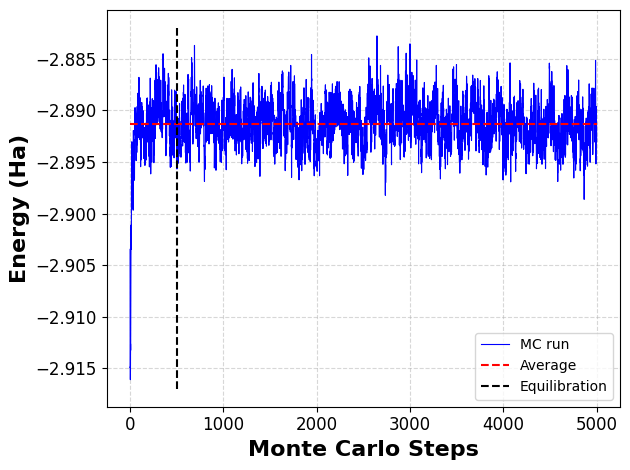

In [7]:
# Create the plot and axis
fig, ax = plt.subplots()

# Plotting the data with error bars
plt.plot(step,E,label='MC run',lw=0.8, c='b')
plt.plot([0,5000],[-2.891279514708962, -2.891279514708962], label = 'Average',c='r',linestyle = '--')
plt.plot([500, 500],[-2.917,-2.882], label = 'Equilibration',c='k', linestyle = '--')



# Label the axes
ax.set_xlabel('Monte Carlo Steps', fontsize=16, fontweight='bold')
ax.set_ylabel('Energy (Ha)', fontsize=16, fontweight='bold')

# Adjust the legend
ax.legend()

# Customize the axis offset text (scientific notation text)
offset_text = ax.yaxis.get_offset_text()
offset_text.set_fontsize(12)  # Change font size
offset_text.set_fontweight('bold')  # Make bold

# Adjust tick label font sizes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Use tight layout to avoid clipping
plt.tight_layout()
plt.grid(True, linestyle= '--',alpha=0.5)
# Show the plot
plt.show()

In [10]:
def autocorelation(data,max_lag = 200,allow_neg = False):
    """
    Compute autocorrelation of a given 1D array.

    Args:
        data (np.ndarray): Input data.
        max_lag (int, optional): Maximum lag to compute autocorrelation. Defaults to 200.
        allow_neg (bool, optional): Whether to allow negative autocorrelation values. Defaults to False.

    Returns:
        tuple: lags, correlation, tc = correlation_time
    """
    if max_lag < 1 or max_lag >= len(data):
        raise ValueError("Max lag must be between 1 and the length of data - 1")

    mc = int(max_lag)#ensure it is an integer
    var = np.var(data,ddof=1)
    center_data = data - np.mean(data)
    lags = np.arange(1, mc+1, 1, dtype=int)
    correlation = np.zeros(mc)
    for j in lags:
        to_av = center_data[:-j]*center_data[j:]
        correlation[j-1] = np.average(to_av)/var
    if not allow_neg:
        correlation[correlation<0] = 0
    tc = 1+2*np.sum(correlation)
    return lags, correlation, tc


l,c,t = autocorelation(E,50,0)
print('Correlation length = ',t)
print('#of independent blocks = ',len(E)/t)

Correlation length =  18.110896079251624
#of independent blocks =  276.07689747213266


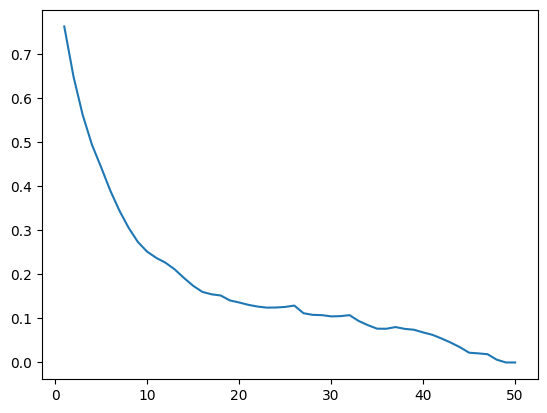

In [11]:
plt.plot(l,c)

In [13]:
np.sqrt(np.var(E_real)/(len(E_real)/t))

0.00012933622051428456